Cars Dataset — Categorical Handling

In [ ]:
# Upload cars.csv
from google.colab import files
uploaded = files.upload()
csv_path = list(uploaded.keys())[0]


Saving cars.csv.csv to cars.csv (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv(csv_path)
print(df.shape)
display(df.head())

(38531, 30)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## Nominal Categorical Encoding (LabelBinarizer)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

nominal_col = df.select_dtypes(include='object').columns[0]
feature = df[nominal_col].astype(str).values.reshape(-1,1)

ohe = LabelBinarizer()
encoded = ohe.fit_transform(feature)

print("Classes:", ohe.classes_)
display(encoded[:10])

Classes: ['Acura' 'Alfa Romeo' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chery' 'Chevrolet'
 'Chrysler' 'Citroen' 'Dacia' 'Daewoo' 'Dodge' 'Fiat' 'Ford' 'Geely'
 'Great Wall' 'Honda' 'Hyundai' 'Infiniti' 'Iveco' 'Jaguar' 'Jeep' 'Kia'
 'LADA' 'Lancia' 'Land Rover' 'Lexus' 'Lifan' 'Lincoln' 'Mazda'
 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan' 'Opel' 'Peugeot' 'Pontiac'
 'Porsche' 'Renault' 'Rover' 'Saab' 'Seat' 'Skoda' 'SsangYong' 'Subaru'
 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo' 'ВАЗ' 'ГАЗ' 'ЗАЗ' 'Москвич' 'УАЗ']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

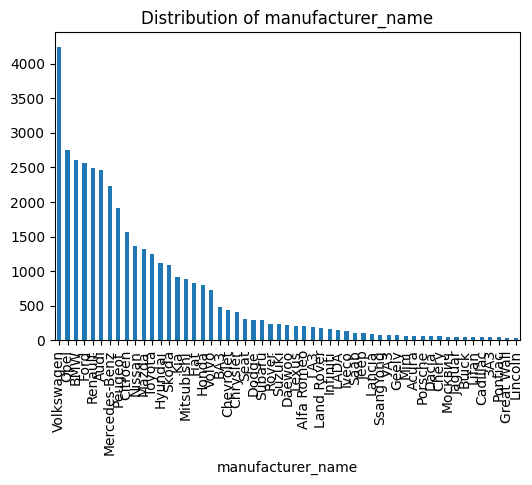

In [ ]:
plt.figure(figsize=(6,4))
pd.Series(df[nominal_col]).value_counts().plot(kind='bar')
plt.title(f'Distribution of {nominal_col}')
plt.show()

## One-Hot Encoding using pandas.get_dummies

In [ ]:
df_dummies = pd.get_dummies(df[nominal_col])
display(df_dummies.head())

,Acura,Alfa Romeo,Audi,BMW,Buick,Cadillac,Chery,Chevrolet,Chrysler,Citroen,...,Subaru,Suzuki,Toyota,Volkswagen,Volvo,ВАЗ,ГАЗ,ЗАЗ,Москвич,УАЗ
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


## MultiLabelBinarizer (Synthetic Example)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multi_col = df[nominal_col].astype(str).apply(lambda x: x.split())  # fake multi-tags
mlb = MultiLabelBinarizer()
encoded_multi = mlb.fit_transform(multi_col)
print(mlb.classes_)
display(encoded_multi[:5])

['Acura' 'Alfa' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chery' 'Chevrolet'
 'Chrysler' 'Citroen' 'Dacia' 'Daewoo' 'Dodge' 'Fiat' 'Ford' 'Geely'
 'Great' 'Honda' 'Hyundai' 'Infiniti' 'Iveco' 'Jaguar' 'Jeep' 'Kia' 'LADA'
 'Lancia' 'Land' 'Lexus' 'Lifan' 'Lincoln' 'Mazda' 'Mercedes-Benz' 'Mini'
 'Mitsubishi' 'Nissan' 'Opel' 'Peugeot' 'Pontiac' 'Porsche' 'Renault'
 'Romeo' 'Rover' 'Saab' 'Seat' 'Skoda' 'SsangYong' 'Subaru' 'Suzuki'
 'Toyota' 'Volkswagen' 'Volvo' 'Wall' 'ВАЗ' 'ГАЗ' 'ЗАЗ' 'Москвич' 'УАЗ']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Ordinal Encoding

In [ ]:
ord_col = df.select_dtypes(include='object').columns[1]
df['ordinal_encoded'] = df[ord_col].astype('category').cat.codes
display(df[[ord_col,'ordinal_encoded']].head())

,model_name,ordinal_encoded
0,Outback,764
1,Outback,764
2,Forester,519
3,Impreza,609
4,Legacy,665


## DictVectorizer Encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

sample_dict = df.head(10).select_dtypes(include=['object','int','float']).fillna('').to_dict(orient='records')
dv = DictVectorizer(sparse=False)
encoded = dv.fit_transform(sample_dict)
print(dv.get_feature_names_out())
display(encoded[:5])

['body_type=sedan' 'body_type=suv' 'body_type=universal' 'color=black'
 'color=blue' 'color=grey' 'color=red' 'color=silver' 'drivetrain=all'
 'duration_listed' 'engine_capacity' 'engine_fuel=gasoline'
 'engine_type=gasoline' 'location_region=Брестская обл.'
 'location_region=Гомельская обл.' 'location_region=Минская обл.'
 'manufacturer_name=Subaru' 'model_name=Forester' 'model_name=Impreza'
 'model_name=Legacy' 'model_name=Outback' 'number_of_photos'
 'odometer_value' 'price_usd' 'state=owned' 'transmission=automatic'
 'transmission=mechanical' 'up_counter' 'year_produced']


array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.60000e+01,
        2.50000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 9.00000e+00, 1.90000e+05, 1.09000e+04, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.30000e+01, 2.01000e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 8.30000e+01,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.20000e+01, 2.90000e+05, 5.00000e+03, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 5.40000e+01, 2.00200e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.51000e+02,
  

## Impute Missing Categorical Values (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# pick categorical + numeric columns
cat = df.select_dtypes(include='object').columns[0]
num_cols = df.select_dtypes(include=np.number).columns[:2]

X = df[num_cols].fillna(df[num_cols].mean())
y = df[cat].astype(str)

mask = y != 'nan'
X_train = X[mask]
y_train = y[mask]

X_missing = X[~mask]

if len(X_missing)>0:
    knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_missing)
    print("Predicted:", y_pred[:10])
else:
    print("No missing categorical values.")

No missing categorical values.


## Handling Imbalanced Classes (Synthetic target)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create synthetic target based on price above median
if 'price' in df.columns:
    median = df['price'].median()
    target = (df['price'] > median).astype(int)
else:
    target = (df.iloc[:,0].astype('category').cat.codes > 2).astype(int)

print(target.value_counts())

weights = {0:0.1,1:0.9}
clf = RandomForestClassifier(class_weight=weights)
clf.fit(df.select_dtypes(include=np.number).fillna(0), target)
print("Model trained with class weights.")

1    35790
0     2741
Name: count, dtype: int64
Model trained with class weights.


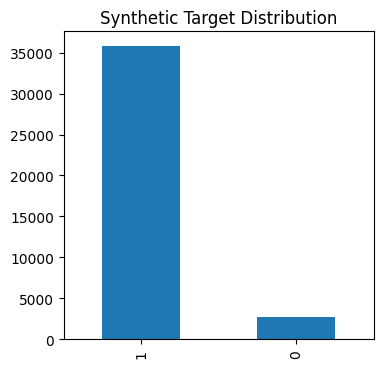

In [ ]:
plt.figure(figsize=(4,4))
target.value_counts().plot(kind='bar')
plt.title("Synthetic Target Distribution")
plt.show()

The Best Method for Your Cars Dataset: One Hot Encoding
What is it

One Hot Encoding means
we take a category and convert it into separate columns
each column represents one category
each value becomes either zero or one

Example

If the fuel type column has
Petrol
Diesel
CNG

Then One Hot Encoding creates three new columns
fuel Petrol
fuel Diesel
fuel CNG

For a Petrol car the row becomes
Petrol = one
Diesel = zero
CNG = zero

This method helps the computer understand categories correctly
because it does not create any wrong order or ranking between them

Why One Hot Encoding is the best for cars.csv

Most columns in your cars dataset do not have any order
For example
Brand
Model
Fuel
Transmission
Color
Seller type

These categories do not have a first or last
Toyota is not higher or lower than Honda
Diesel is not greater than Petrol
Red is not better than Blue

Since there is no order
One Hot Encoding is the best method
because it keeps the data neutral and fair
It does not assume any ranking
It does not confuse the machine learning model

This makes your model more accurate and more stable

When to use other methods
Use Ordinal Encoding only if the column has natural order

For example
Owner
First owner
Second owner
Third owner

This has a natural order
so ordinal encoding is correct here

Use KNN imputer only if values are missing

If your dataset has missing values in some columns
KNN can guess the missing values using other similar rows
But if  dataset does not have missing values
you do not need this method

do not need

Multi label encoding
Dictionary vectorizer
because cars dataset does not use these formats